In [59]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Task 1 - All spots and All cell types as input
1. Run the jupyter notebook: run_cell2location
2. Evaluating the results

In [60]:
ids = {'spaceranger110_count_38385_OTAR_LNGsp10206160_GRCh38-2020-A': 'P17_T2',
 'spaceranger110_count_36209_OTAR_LNGsp9476038_GRCh38-2020-A': 'P10_T1',
 'spaceranger110_count_39586_OTAR_LNGsp10391238_GRCh38-2020-A': 'P24_T2',
 'spaceranger110_count_40612_OTAR_LNGsp10782313_GRCh38-2020-A': 'P19_B2',
 'spaceranger110_count_39586_OTAR_LNGsp10391237_GRCh38-2020-A': 'P24_T1',
 'spaceranger110_count_36209_OTAR_LNGsp9476039_GRCh38-2020-A': 'P10_T2',
 'spaceranger110_count_38262_OTAR_LNGsp10206166_GRCh38-2020-A': 'P16_T2',
 'spaceranger110_count_38385_OTAR_LNGsp10206159_GRCh38-2020-A': 'P17_T1',
 'spaceranger110_count_36209_OTAR_LNGsp9476040_GRCh38-2020-A': 'P10_T3',
 'spaceranger110_count_38385_OTAR_LNGsp10206158_GRCh38-2020-A': 'P15_T2',
 'spaceranger110_count_38385_OTAR_LNGsp10206157_GRCh38-2020-A': 'P15_T1',
 'spaceranger110_count_38384_OTAR_LNGsp10206164_GRCh38-2020-A': 'D1_2',
 'spaceranger110_count_39586_OTAR_LNGsp10391236_GRCh38-2020-A': 'P25_T2',
 'spaceranger110_count_36209_OTAR_LNGsp9476041_GRCh38-2020-A': 'P10_T4',
 'spaceranger110_count_38384_OTAR_LNGsp10206161_GRCh38-2020-A': 'D2_1',
 'spaceranger110_count_40951_OTAR_LNGsp10922366_GRCh38-2020-A': 'P17_B2',
 'spaceranger110_count_40951_OTAR_LNGsp10922365_GRCh38-2020-A': 'P17_B1',
 'spaceranger110_count_36210_OTAR_LNGsp9476045_GRCh38-2020-A': 'P11_T4',
 'spaceranger110_count_39586_OTAR_LNGsp10391235_GRCh38-2020-A': 'P25_T1',
 'spaceranger110_count_40751_OTAR_LNGsp10782317_GRCh38-2020-A': 'P10_B2',
 'spaceranger110_count_40612_OTAR_LNGsp10782311_GRCh38-2020-A': 'P15_B2',
 'spaceranger110_count_40952_OTAR_LNGsp10922370_GRCh38-2020-A': 'P25_B2',
 'spaceranger110_count_40612_OTAR_LNGsp10782312_GRCh38-2020-A': 'P19_B1',
 'spaceranger110_count_40951_OTAR_LNGsp10922368_GRCh38-2020-A': 'P16_B2',
 'spaceranger110_count_36210_OTAR_LNGsp9476044_GRCh38-2020-A': 'P11_T3',
 'spaceranger110_count_40751_OTAR_LNGsp10782314_GRCh38-2020-A': 'P11_B1',
 'spaceranger110_count_40751_OTAR_LNGsp10782316_GRCh38-2020-A': 'P10_B1',
 'spaceranger110_count_40952_OTAR_LNGsp10922371_GRCh38-2020-A': 'P24_B1',
 'spaceranger110_count_40612_OTAR_LNGsp10782310_GRCh38-2020-A': 'P15_B1',
 'spaceranger110_count_38262_OTAR_LNGsp10206168_GRCh38-2020-A': 'P19_T2',
 'spaceranger110_count_38262_OTAR_LNGsp10206167_GRCh38-2020-A': 'P19_T1',
 'spaceranger110_count_40951_OTAR_LNGsp10922367_GRCh38-2020-A': 'P16_B1',
 'spaceranger110_count_38384_OTAR_LNGsp10206163_GRCh38-2020-A': 'D1_1',
 'spaceranger110_count_38384_OTAR_LNGsp10206162_GRCh38-2020-A': 'D2_2',
 'spaceranger110_count_40952_OTAR_LNGsp10922369_GRCh38-2020-A': 'P25_B1',
 'spaceranger110_count_38262_OTAR_LNGsp10206165_GRCh38-2020-A': 'P16_T1',
 'spaceranger110_count_36210_OTAR_LNGsp9476042_GRCh38-2020-A': 'P11_T1',
 'spaceranger110_count_36210_OTAR_LNGsp9476043_GRCh38-2020-A': 'P11_T2',
 'spaceranger110_count_40751_OTAR_LNGsp10782315_GRCh38-2020-A': 'P11_B2',
 'spaceranger110_count_40952_OTAR_LNGsp10922372_GRCh38-2020-A': 'P24_B2'}

In [63]:
#path to the folder where the output of cell2location is located

env = "cell2location_task1/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Healthy"
folder = "/home/biolab/Projects/LAMs_wd/results/"
cell2location_res_all_cts = sc.read_h5ad(f"{folder}{env}/sp_our_sig_matrix_all_cts_Healthy.h5ad")



In [64]:
patients = list(cell2location_res_all_cts.uns["spatial"].keys())

#dict to sort the ouput for each patient
slices = {}

for patient in patients:
    
    slices [patient] = {}
    #get  specific spots for that patient
    spots = [s for s in cell2location_res_all_cts.obs_names if patient in s]
    
    slice_res = cell2location_res_all_cts[spots].copy()
    #slice_res.obs_names = [s.replace(f"{patient}_","") for s in slice_res.obs_names]
    
    #retireve the cell abundance matrix
    weights = slice_res.obsm["q05_cell_abundance_w_sf"]
    weights.columns = [c.replace("q05cell_abundance_w_sf_", "") for c in weights]

    
    slices[patient]["w"] = weights.copy()
    #add a column that contains the cell type id with the highest weight
    slices[patient]["w"]['max_w'] = slices[patient]["w"].idxmax(axis=1)
    
    #add two columns that consist of the spot's spatial data
    slices[patient]["w"]["x"] = slice_res.obsm["spatial"][:,0]
    slices[patient]["w"]["y"] = slice_res.obsm["spatial"][:,1]

In [65]:
#in this section, i check the version where cell2location was run using all 24 cell types.
#then, i count how many spots per patient have a high abundance assigned to a macrophage cell type.
#i also store these ids in a list named: spots
macro_spots = {}
spots = set()
for patient in patients:
    macro_spots[patient] = slices[patient]["w"][slices[patient]["w"]["max_w"].isin(["Macrophage_alveolar", "Macrophage"])]
    print(ids[patient], ":", macro_spots[patient].shape[0])
    spots = spots.union(set(macro_spots[patient].index))

D2_1 : 156
D2_2 : 250
D1_1 : 5
D1_2 : 7


In [66]:
len(spots)

418

In [67]:
# Clean up the env string to avoid using directory-like structures
env_cleaned = env.strip("/").replace("/", "_")  # Replace slashes with underscores

# Now write to a file with a valid name
with open(f"luad_macrophage_spots_{env_cleaned}.txt", "w") as o:
    for spot in spots:
        o.write(f"{spot}\n")


In [68]:
if not os.path.exists(f"output/{env}/deconv_1/"):
    os.makedirs(f"output/{env}/deconv_1/")
for patient in patients:
    slices[patient]["w"].to_csv(f"output/{env}/deconv_1/{ids[patient]}_deconv_1_cell_abundance.xlsx")

Task 2 - Macro. spots and Macro. cell types as input

1. Run the jupyter notebook:  run_cell2location_macrophage_spots
2. Evaluating the results

In [69]:

env = "cell2location_task2/spatial_model_SC_Y_sig_matrix_adeno_macrophages_sub_spots_LUSC_patients/Healthy"
folder = "/home/biolab/Projects/LAMs_wd/results/"
cell2location_res_macrophages = sc.read_h5ad(f"{folder}/{env}/sp_our_sig_matrix_macrophage_cts_Healthy.h5ad")

In [70]:
patients = list(cell2location_res_macrophages.uns["spatial"].keys())
slices_macrophages = {}
for patient in patients:
    
    slices_macrophages [patient] = {}
    
    #get  specific spots for that patient
    spots = [s for s in cell2location_res_macrophages.obs_names if patient in s]
    
    slice_res = cell2location_res_macrophages[spots].copy()
    slice_res.obs_names = [s.replace(f"{patient}_","") for s in slice_res.obs_names]
    
    #retireve the cell abundance matrix
    weights = slice_res.obsm["q05_cell_abundance_w_sf"]
    weights.columns = [c.replace("q05cell_abundance_w_sf_", "") for c in weights]

    #add a column that contains the cell type id with the highest weight
    slices_macrophages[patient]["w"] = weights.copy()
    slices_macrophages[patient]["w"]['max_w'] = slices_macrophages[patient]["w"].idxmax(axis=1)
    slices_macrophages[patient]["w"]["x"] = slice_res.obsm["spatial"][:,0]
    slices_macrophages[patient]["w"]["y"] = slice_res.obsm["spatial"][:,1]

In [71]:
if not os.path.exists(f"{env}/deconv_2/"):
    os.makedirs(f"{env}/deconv_2/")
for patient in patients:
    slices_macrophages[patient]["w"].to_csv(f"{env}/deconv_2/{ids[patient]}_deconv_2_cell_abundance.xlsx")

Task 3: Plots

In [72]:
colors = [
    '#e6194b',  
    '#4363d8',  
    '#f58231',  
    '#911eb4',  
    '#f032e6',  
    '#008080', 
    '#e6beff',  
    '#9a6324',  
    '#800000',  
    '#000075',  
    '#808080',  
    '#000000',  
    '#a9a9a9',  
    '#ff00ff',  
    '#cd853f',  
    '#ff4500',  
    '#1e90ff',  
    '#9932cc',  
    '#b22222',  
    '#2e8b57',  
    '#ff1493',  
    '#5f9ea0',  
    '#da70d6', 
    '#ffa07a',  
    '#778899',  
    '#d2691e',  
    '#8a2be2',  
]

markers = ['o', 's', 'v', '^', '<', '>', 'P', 'X', 'D', '*', '+', 'x', '1', '2', '3', '4', '|', '_', 'H', '8']

In [73]:
if not os.path.exists(f"{env}/plots/"):
    os.makedirs(f"{env}/plots/")

D2_1


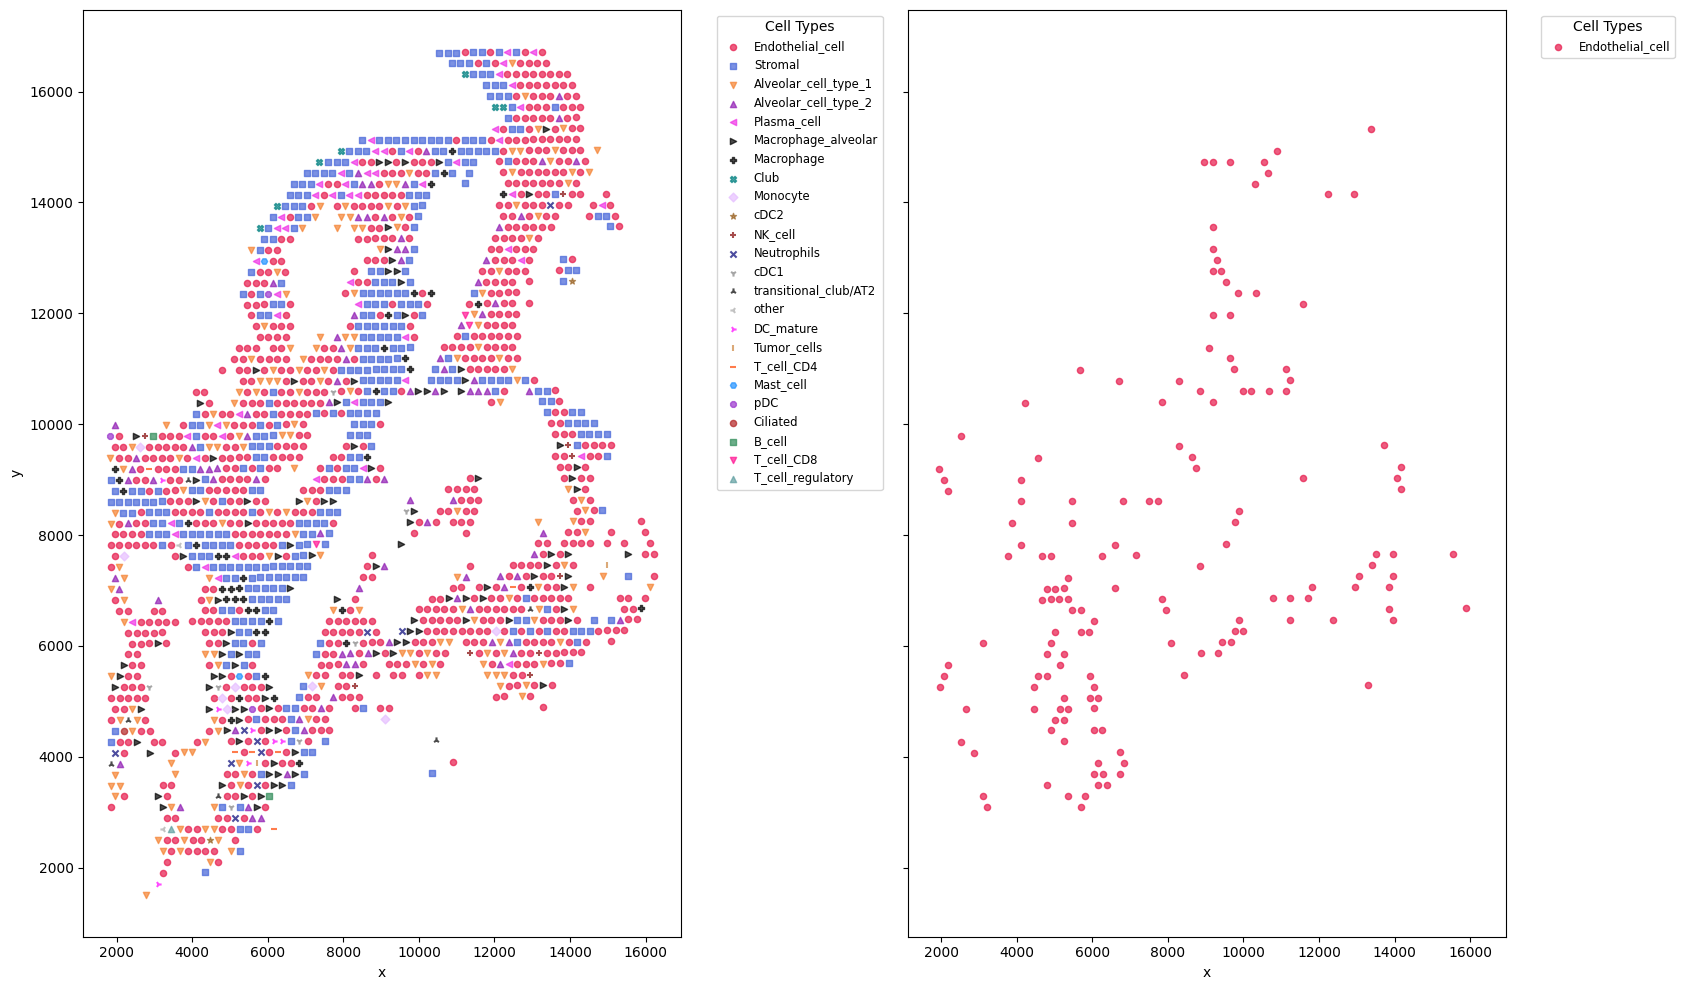

D2_2


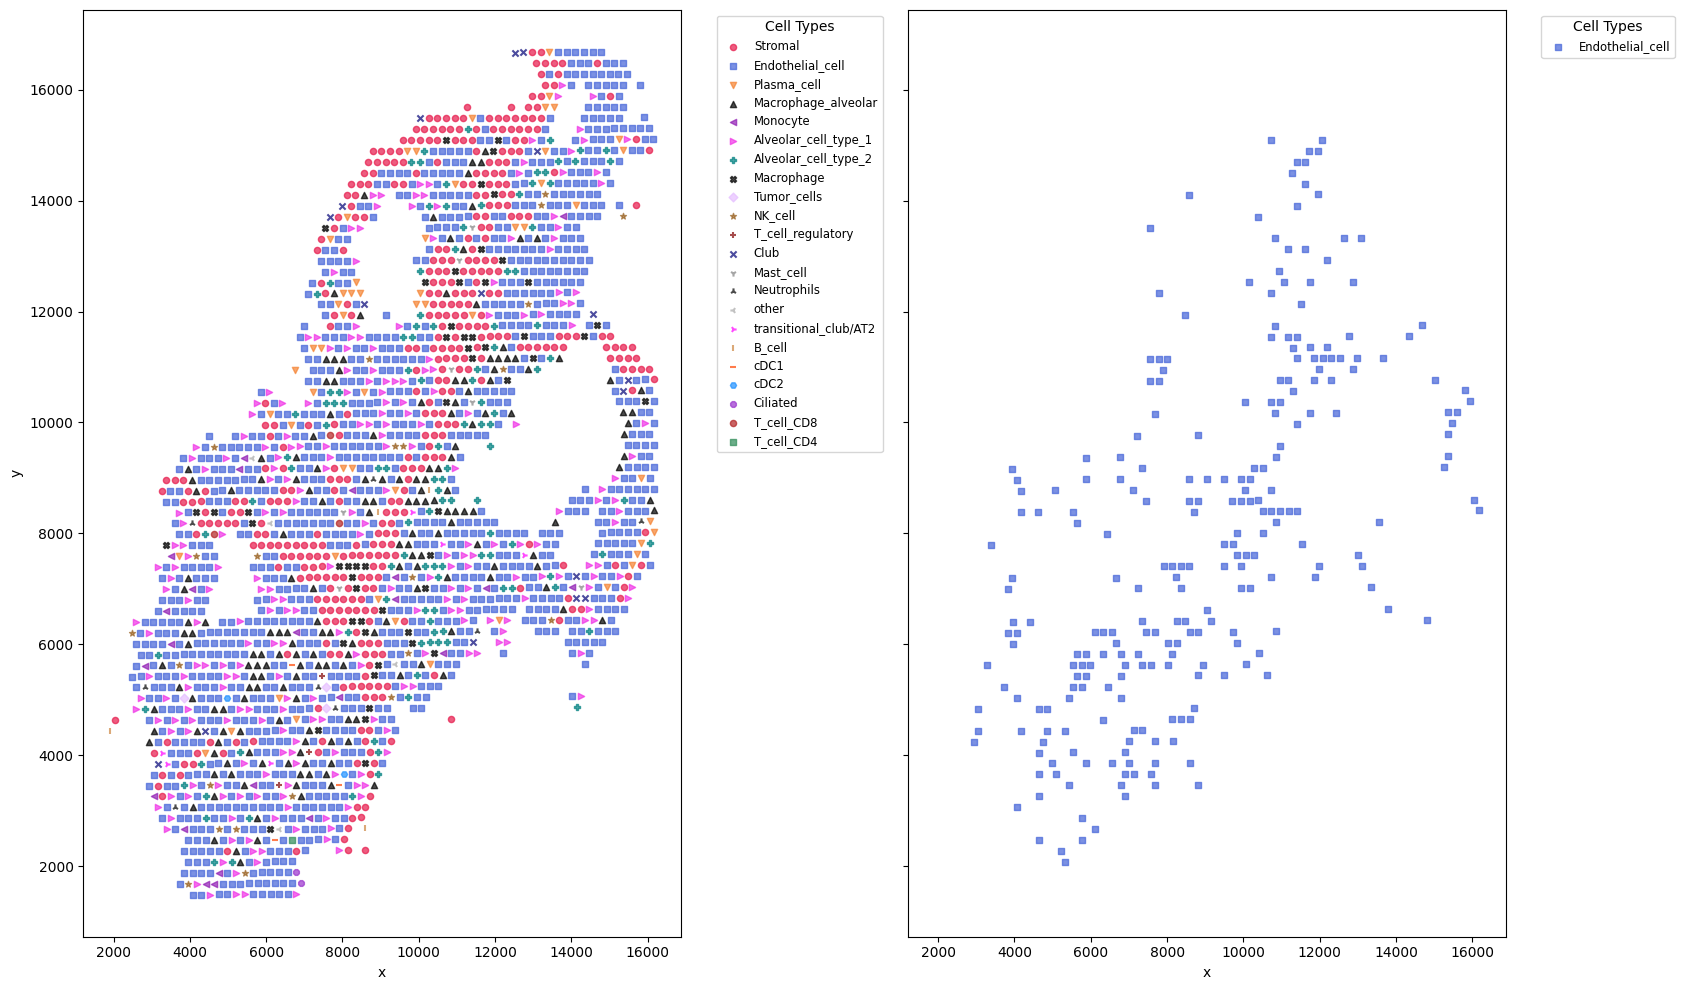

D1_1


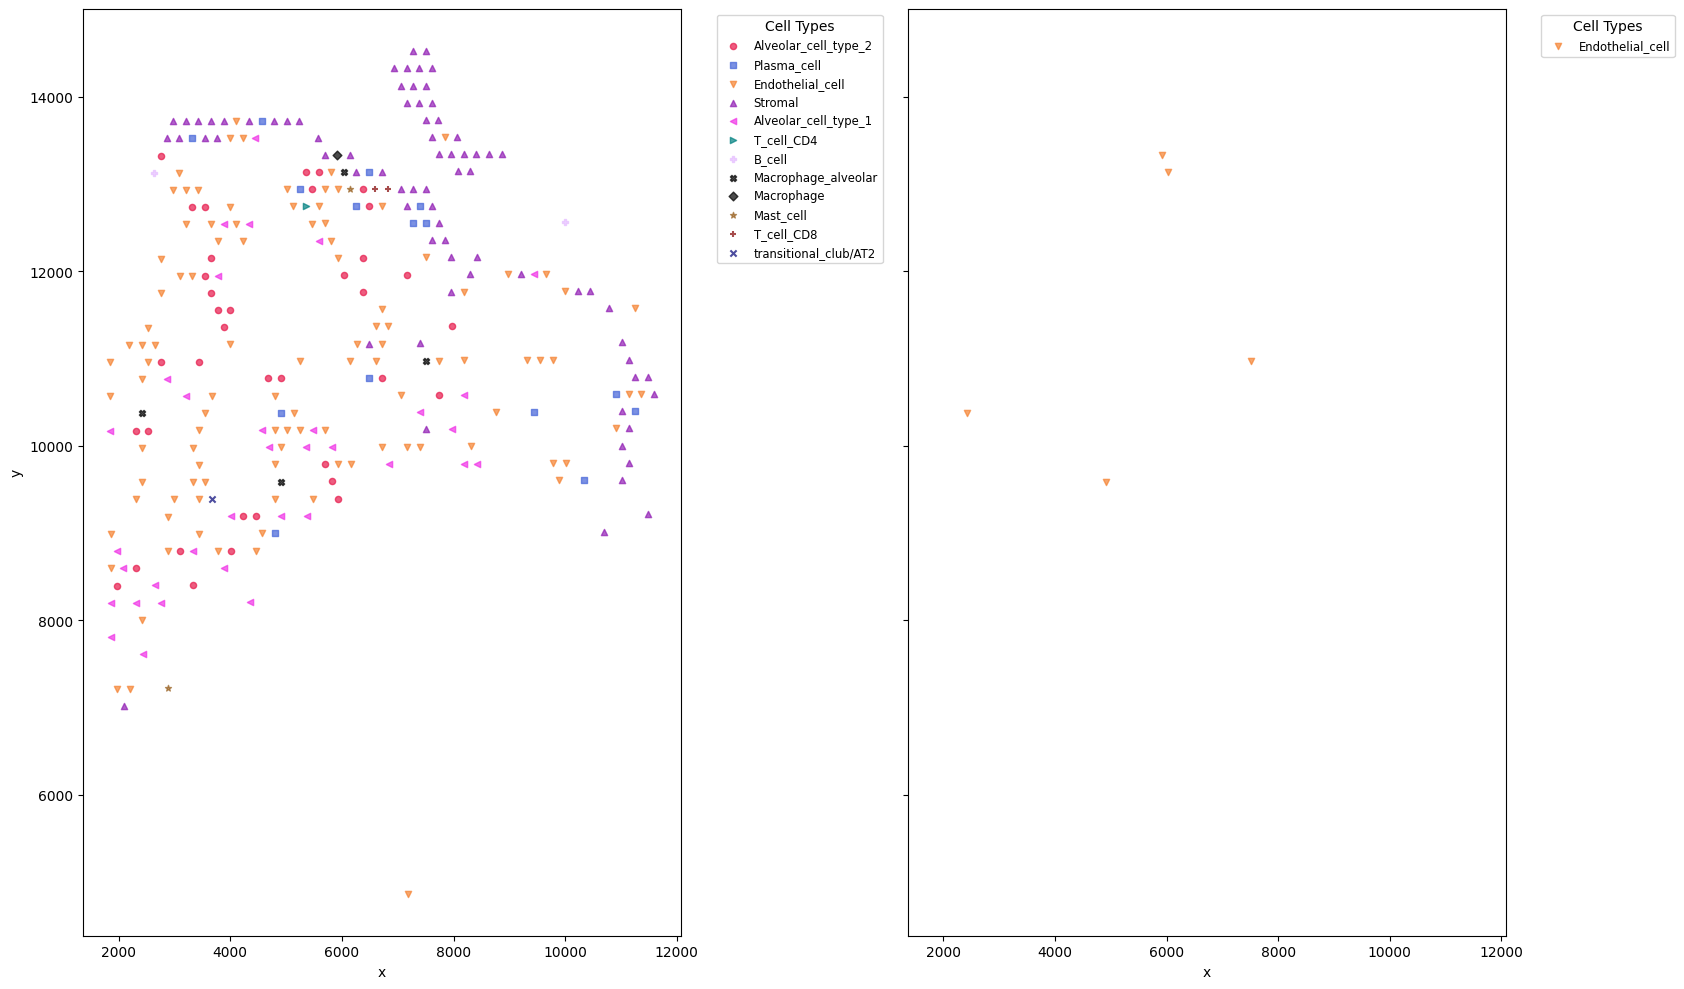

D1_2


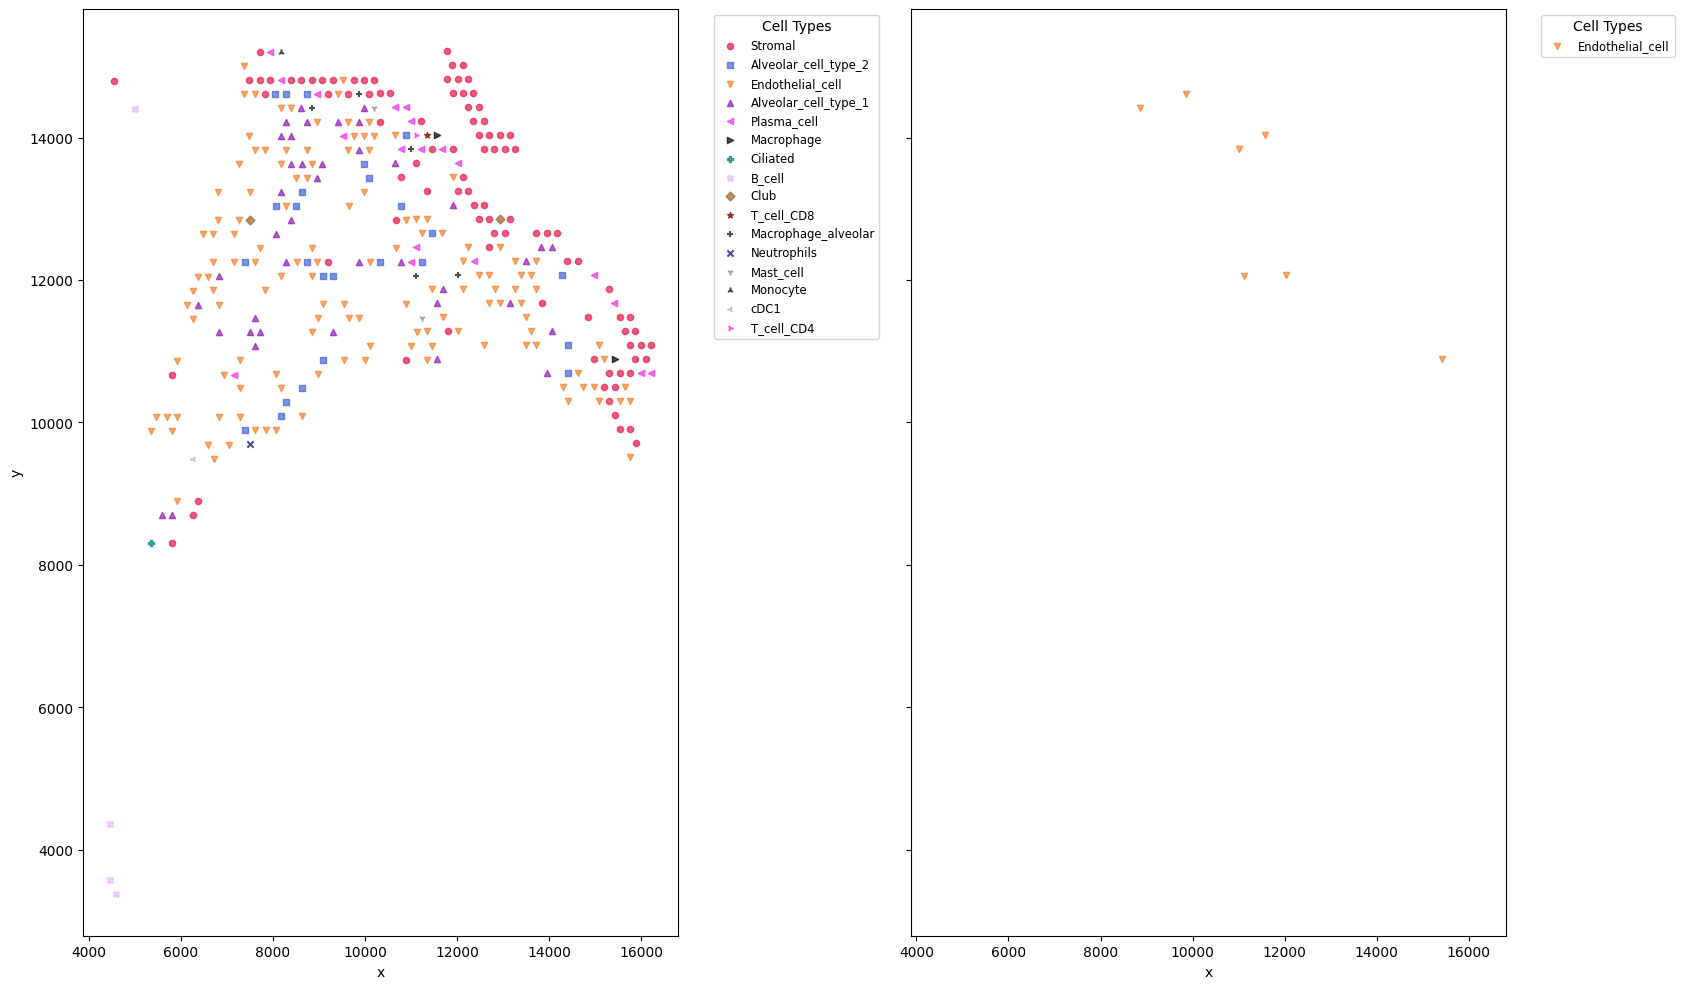

In [74]:
for patient in patients:
    print(ids[patient])
    task1_weights = slices[patient]["w"]
    task2_weights = slices_macrophages[patient]["w"]


    all_cell_types = pd.concat([task1_weights['max_w'], task2_weights['max_w']]).unique()

    #extend colors/markers if needed
    while len(colors) < len(all_cell_types):
        colors += colors

    while len(markers) < len(all_cell_types):
        markers += markers

    #assign marker and color maps
    marker_map = {}
    color_map = {}
    color_idx = 0
    for i, cell_type in enumerate(all_cell_types):
        marker_map[cell_type] = markers[i]
        if 'macrophage' in cell_type.lower(): # for task 1 i assign black color to macrophage spots
            color_map[cell_type] = 'black'
        else:
            color_map[cell_type] = colors[color_idx]
            color_idx += 1

    #create plots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

    #plot for Task 1
    handles0, labels0 = [], []
    for cell_type in task1_weights['max_w'].unique():
        subset = task1_weights[task1_weights['max_w'] == cell_type]
        sc = axs[0].scatter(subset['x'], subset['y'],
                            marker=marker_map[cell_type],
                            color=color_map[cell_type],
                            s=20, 
                            alpha=0.7,
                            label=cell_type)
        handles0.append(sc)
        labels0.append(cell_type)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")

    #plot for Task 2
    handles1, labels1 = [], []
    for cell_type in task2_weights['max_w'].unique():
        subset = task2_weights[task2_weights['max_w'] == cell_type]
        sc = axs[1].scatter(subset['x'], subset['y'],
                            marker=marker_map[cell_type],
                            color=color_map[cell_type],
                            s=20, 
                            alpha=0.7,
                            label=cell_type)
        handles1.append(sc)
        labels1.append(cell_type)
    axs[1].set_xlabel("x")

    #legends
    axs[0].legend(handles0, labels0, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Cell Types')
    axs[1].legend(handles1, labels1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Cell Types')

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig(f"{env}/plots/{ids[patient]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()
